In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Data Collection and PreProcessing

In [ ]:
data = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data.shape

(270, 14)

In [ ]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
data['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


Label Encoding

In [ ]:
data.loc[data['Heart Disease'] == 'Presence', 'Heart Disease'] = 1
data.loc[data['Heart Disease'] == 'Absence', 'Heart Disease'] = 0

In [ ]:
data['Heart Disease'] = pd.to_numeric(data['Heart Disease'])

In [ ]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<Axes: xlabel='Age', ylabel='Count'>

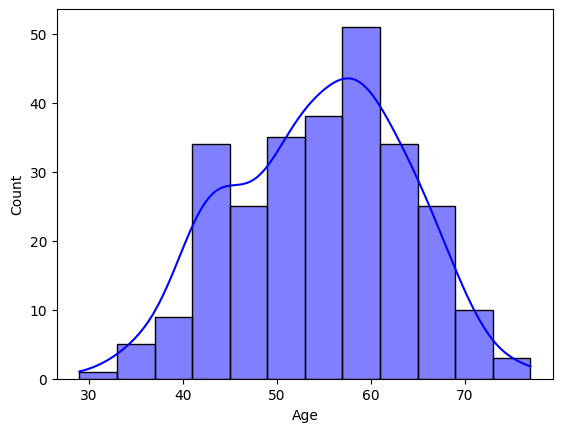

In [ ]:
sns.histplot(data['Age'],kde=True,color='Blue')

Data Standarization

In [ ]:
'''features = data[['BP','Cholesterol','Max HR']]
scaler = StandardScaler()
X_std= scaler.fit_transform(features)
data[['BP','Cholesterol','Max HR']] = X_std
'''

"features = data[['BP','Cholesterol','Max HR']]\nscaler = StandardScaler()\nX_std= scaler.fit_transform(features)\ndata[['BP','Cholesterol','Max HR']] = X_std\n"

In [ ]:
features = data[['BP','Cholesterol','Max HR']]
scaler = MinMaxScaler()
X_normalized= scaler.fit_transform(features)
data[['BP','Cholesterol','Max HR']] = X_normalized


Splitting the features and target

In [ ]:
X = data.drop(columns='Heart Disease', axis=1)
Y = data['Heart Disease']

In [ ]:
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,0.339623,0.447489,0,2,0.290076,0,2.4,2,3,3
1,67,0,3,0.198113,1.000000,0,2,0.679389,0,1.6,2,0,7
2,57,1,2,0.283019,0.308219,0,0,0.534351,0,0.3,1,0,7
3,64,1,4,0.320755,0.312785,0,0,0.259542,1,0.2,2,1,7
4,74,0,2,0.245283,0.326484,0,2,0.381679,1,0.2,1,1,3


Splitting the data into train and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(270, 13) (216, 13) (54, 13)


Model Training & Evaluation

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=400),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

result = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    result[model_name] = accuracy

for model_name, accuracy in result.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8889
SVM Accuracy: 0.7037
XGBoost Accuracy: 0.8148
